In [1]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
img = cv2.imread('./Imgtest/kaif_1.jpg')
img.shape

(1280, 960, 3)

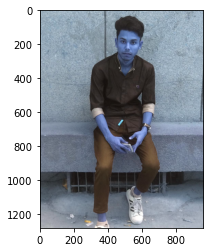

In [3]:
plt.imshow(img)

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(1280, 960)

In [5]:
gray

array([[162, 160, 160, ..., 191, 180, 183],
       [166, 163, 162, ..., 193, 182, 185],
       [171, 168, 167, ..., 197, 186, 185],
       ...,
       [180, 179, 177, ..., 182, 184, 185],
       [179, 179, 179, ..., 182, 184, 185],
       [180, 180, 180, ..., 182, 184, 186]], dtype=uint8)

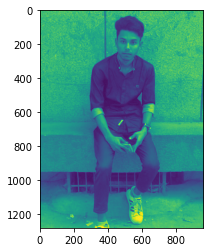

In [6]:
plt.imshow(gray)

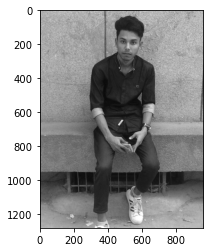

In [7]:
plt.imshow(gray, cmap='gray')

In [8]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[428, 122, 173, 173]])

In [9]:
(x,y,w,h) = faces[0]
x,y,w,h

(428, 122, 173, 173)

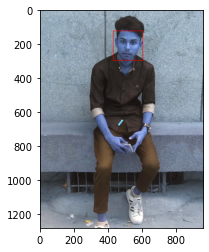

In [10]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

#Here detecting Face and Eye, where Eye detecting after face detection, 1. Face, 2.Co-ordinate of face, 3. Eye detection with the help of face co-ordinate

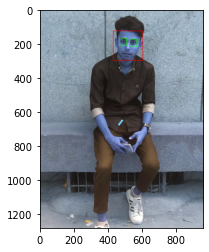

In [11]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

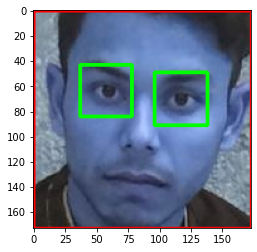

In [12]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [13]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

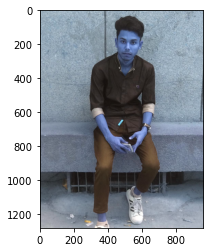

In [14]:
original_image = cv2.imread('./Imgtest/kaif_1.jpg')
plt.imshow(original_image)

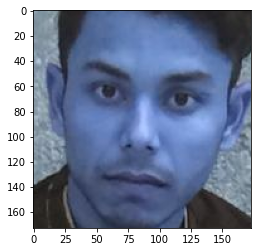

In [15]:
cropped_image = get_cropped_image_if_2_eyes('./Imgtest/kaif_1.jpg')
plt.imshow(cropped_image)

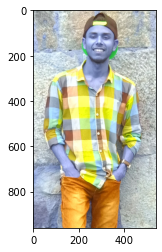

In [16]:
org_image_obstructed = cv2.imread('./imgtest/kaif_2.png')
plt.imshow(org_image_obstructed)

In [17]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./imgtest/kaif_2.png')
cropped_image_no_2_eyes

array([[[219, 202, 180],
        [218, 202, 179],
        [218, 203, 180],
        ...,
        [228, 217, 195],
        [231, 222, 201],
        [219, 212, 192]],

       [[222, 206, 183],
        [220, 204, 181],
        [220, 205, 182],
        ...,
        [222, 211, 189],
        [229, 219, 198],
        [216, 208, 188]],

       [[219, 204, 181],
        [218, 203, 180],
        [219, 204, 181],
        ...,
        [210, 198, 177],
        [220, 210, 189],
        [215, 206, 186]],

       ...,

       [[180, 201, 229],
        [163, 184, 212],
        [170, 191, 218],
        ...,
        [158, 175, 172],
        [141, 162, 159],
        [121, 146, 142]],

       [[174, 195, 224],
        [167, 188, 216],
        [173, 194, 221],
        ...,
        [173, 187, 185],
        [155, 173, 170],
        [132, 153, 150]],

       [[174, 195, 224],
        [169, 190, 218],
        [168, 189, 216],
        ...,
        [172, 186, 184],
        [162, 179, 177],
        [149, 170, 167]]

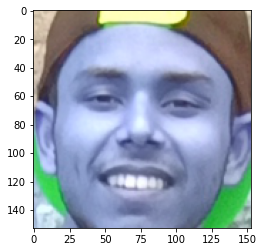

In [18]:
cropped_image = get_cropped_image_if_2_eyes('./imgtest/kaif_2.png')
plt.imshow(cropped_image)

In [19]:
path_to_data = "./imgclass/"
path_to_cr_data = "./imgclass/cropped/"

In [20]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [21]:
img_dirs

['./imgclass/abdul_kalam',
 './imgclass/b_nicholas_tesla',
 './imgclass/b_stephen_hawking',
 './imgclass/cropped']

In [22]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [23]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)
    
    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name 
            
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1    

abdul_kalam
Generating cropped images in folder:  ./imgclass/cropped/abdul_kalam


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cv::cvtColor'


# Feature engeering 
##  Lecture 4

In [26]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'abdul_kalam': 0}

# Images in cropped folder can be used for model training. We will use these raw images along with wavelet transformed images to train our classifier. Let's prepare X and y now

In [25]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])     

NameError: name 'w2d' is not defined